### Sentiment Analysis on Sephora Product Reviews: EDA
In this notebook I will be performing EDA on the datasets I created in the previous notebook.  I will be gaining insights into the customer base and products included as well as taking a closer look at the text data through ngrams.

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk import FreqDist
from nltk.corpus import stopwords

import pickle

In [2]:
# import dataframes from pickle

reviews = pd.read_pickle('reviews.pkl')
reviews_text_only = pd.read_pickle('reviews_text_only.pkl')

In [3]:
# first we're going to look at the reviews dataset

In [4]:
reviews.head()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,5,1.0,1.0,6,0,6,2019-10-13,This is an amazing cleanser!! I was looking fo...,Will solve your clogged pore problems!,olive,green,combination,black,P474937,Vinopure Pore Purifying Gel Cleanser,Caudalie,30.0
1,5,1.0,NaN,0,0,0,2017-08-28,I have really enjoyed using my new Kate Somerv...,Love this product!,fair,hazel,normal,brown,P421276,ExfoliKate Glow Moisturizer,Kate Somerville,76.0
2,5,1.0,NaN,0,0,0,2023-02-02,Where has this been my adult life?! After one ...,My new BFF,fair,blue,normal,red,P504007,Ceramidin Skin Barrier Moisturizing Cream,Dr. Jart+,48.0
3,5,1.0,NaN,0,0,0,2023-02-10,I love using the Caudalie Instant Detox Clay M...,Caudalie Detox Clay Mask!,medium,brown,combination,NaN,P395615,Pore Minimizing Instant Detox Mask,Caudalie,42.0
4,5,1.0,NaN,0,0,0,2023-03-14,I recently started using the gua sha and neede...,Works great with Gua sha,NaN,brown,combination,NaN,P504429,Hydrating Serum,SEPHORA COLLECTION,20.0


In [5]:
# view shape

reviews.shape

(100000, 17)

In [6]:
# view value counts per skin tone, skin type, eye color, and hair color categories

print("Skin Tones")
print(reviews['skin_tone'].value_counts())
print("\n")
print("Skin Types")
print(reviews['skin_type'].value_counts())
print("\n")
print("Eye Colors")
print(reviews['eye_color'].value_counts())
print("\n")
print("Hair Colors")
print(reviews['hair_color'].value_counts())

Skin Tones
light          27348
fair           21713
lightMedium    19749
medium          7151
mediumTan       6229
fairLight       6164
tan             3491
deep            2177
rich             533
olive            178
porcelain        167
dark              55
notSureST          7
ebony              1
Name: skin_tone, dtype: int64


Skin Types
combination    53585
dry            18487
normal         13776
oily           11797
Name: skin_type, dtype: int64


Eye Colors
brown    50410
blue     18379
green    12909
hazel    12541
Grey       527
gray        71
Name: eye_color, dtype: int64


Hair Colors
brown       42583
blonde      21743
black       20365
auburn       3324
red          2755
brunette     1145
gray          619
Name: hair_color, dtype: int64


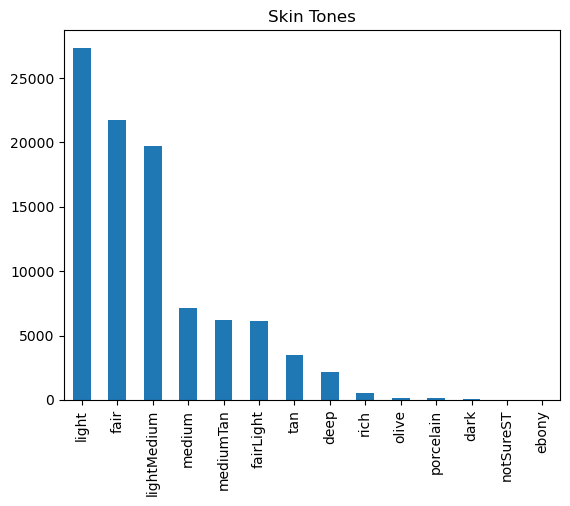

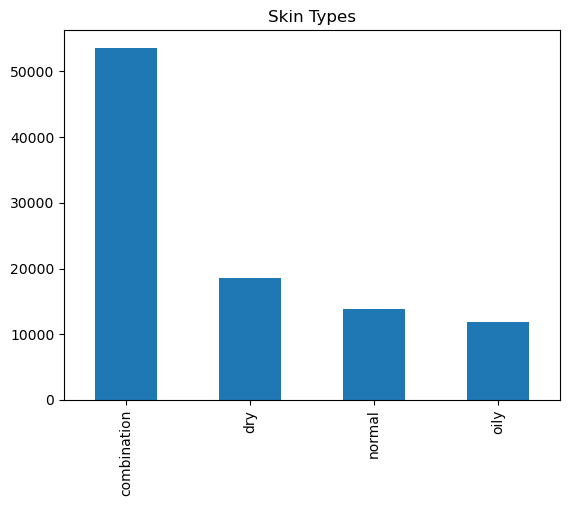

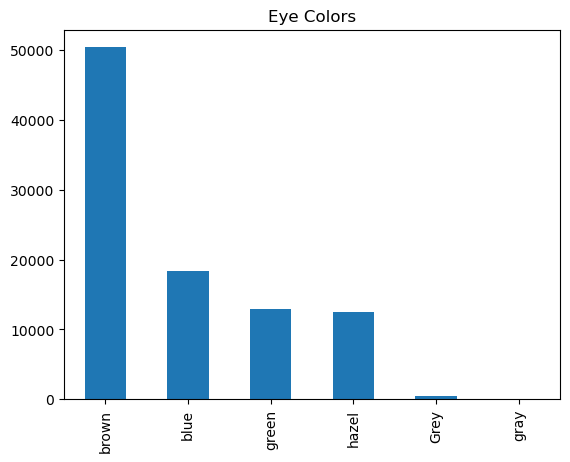

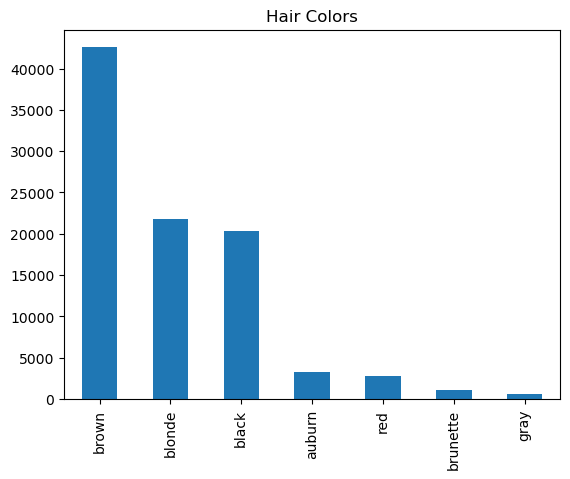

In [7]:
# visualize the above values

reviews['skin_tone'].value_counts().plot(kind='bar')
plt.title("Skin Tones")
plt.show()

reviews['skin_type'].value_counts().plot(kind='bar')
plt.title("Skin Types")
plt.show()

reviews['eye_color'].value_counts().plot(kind='bar')
plt.title("Eye Colors")
plt.show()

reviews['hair_color'].value_counts().plot(kind='bar')
plt.title("Hair Colors")
plt.show()

In [8]:
# view brand names

print("Brand Names")
print(reviews['brand_name'].unique())

Brand Names
['Caudalie' 'Kate Somerville' 'Dr. Jart+' 'SEPHORA COLLECTION'
 'Supergoop!' 'The Ordinary' 'Murad' 'Josie Maran' 'Peter Thomas Roth'
 'Naturally Serious' 'Shiseido' 'Herbivore' 'Lancôme' 'Wishful'
 'iNNBEAUTY PROJECT' 'Youth To The People' 'WASO' "Kiehl's Since 1851"
 'The INKEY List' 'Sulwhasoo' 'Glow Recipe' 'Origins' 'The Nue Co.'
 'Sunday Riley' 'IT Cosmetics' 'Charlotte Tilbury' 'Estée Lauder'
 'Isle of Paradise' 'COOLA' 'Dermalogica' "L'Occitane" 'Farmacy'
 'OLEHENRIKSEN' 'REN Clean Skincare' 'KORRES' 'Skinfix' 'belif' 'fresh'
 'GLO Science' 'FOREO' 'Algenist' 'SK-II' 'tarte' 'alpyn beauty'
 'Biossance' 'Drunk Elephant' 'KORA Organics' 'Tatcha' 'Saint Jane Beauty'
 'MILK MAKEUP' 'Dr. Barbara Sturm' 'Dr. Zenovia Skincare' 'Hyper Skin'
 'Clarins' 'Tower 28 Beauty' 'TULA Skincare' "Paula's Choice" 'La Mer'
 'Summer Fridays' 'Peace Out' 'Dr. Brandt Skincare' 'HUM Nutrition' 'goop'
 'Topicals' 'Augustinus Bader' 'Mario Badescu' 'LANEIGE'
 'Shani Darden Skin Care' 'Alpha-H

In [9]:
# view min, max, and avg price

print("Price min: ", reviews['price_usd'].min())
print("Price max: ", reviews['price_usd'].max())
print("Price avg: ", reviews['price_usd'].mean())

Price min:  3.0
Price max:  1900.0
Price avg:  51.863684100004875


In [10]:
# visualize value counts per rating and recommendation

print("Rating Counts")
print(reviews['rating'].value_counts())
print("\n")
print("Recomendation Counts")
print(reviews['is_recommended'].value_counts())

Rating Counts
5    37403
3    17746
1    17277
2    14484
4    13090
Name: rating, dtype: int64


Recomendation Counts
1.0    50000
0.0    50000
Name: is_recommended, dtype: int64


In [11]:
# split text only dataset into recommended vs not recommended

pos_rev = reviews_text_only[reviews_text_only["is_recommended"] == 1]
neg_rev = reviews_text_only[reviews_text_only["is_recommended"] == 0]

In [12]:
pos_rev.head()

,review_text,text_preproc,is_recommended
0,This is an amazing cleanser!! I was looking fo...,this is an amazing cleanser i was looking for ...,1.0
1,I have really enjoyed using my new Kate Somerv...,i have really enjoyed using my new kate somerv...,1.0
2,Where has this been my adult life?! After one ...,where has this been my adult life after one us...,1.0
3,I love using the Caudalie Instant Detox Clay M...,i love using the caudalie instant detox clay m...,1.0
4,I recently started using the gua sha and neede...,i recently started using the gua sha and neede...,1.0


In [13]:
neg_rev.head()

,review_text,text_preproc,is_recommended
50000,Save your money! This left me hilariously stre...,save your money this left me hilariously strea...,0.0
50001,I normally shy away from trying out fresh prod...,i normally shy away from trying out fresh prod...,0.0
50002,I am obsessed with Laneige products - especial...,i am obsessed with laneige products especiall...,0.0
50003,I have received this product to test from Infl...,i have received this product to test from infl...,0.0
50004,This product got over 300 positive reviews in ...,this product got over 300 positive reviews in ...,0.0


In [14]:
# create a corpus for each set

p_corpus = {}
p_corpus_string = ''
for t in pos_rev:
    p_corpus[t]= ' '.join(pos_rev['text_preproc'].tolist())
p_corpus = list(p_corpus.values())
for x in p_corpus:
    p_corpus_string += x
    
p_corpus_string = re.sub(r'[^\w\s]', '', p_corpus_string)

In [15]:
n_corpus = {}
n_corpus_string = ''
for t in neg_rev:
    n_corpus[t]= ' '.join(neg_rev['text_preproc'].tolist())
n_corpus = list(n_corpus.values())
for x in n_corpus:
    n_corpus_string += x
    
n_corpus_string = re.sub(r'[^\w\s]', '', n_corpus_string)

In [16]:
# import stopwords

stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
p_corpus_string = ' '.join([word for word in p_corpus_string.split() if word not in stopwords])
n_corpus_string = ' '.join([word for word in n_corpus_string.split() if word not in stopwords])

In [18]:
# function to compute frequency of ngram

def compute_freq(sentence, n_value):

    tokens = nltk.word_tokenize(sentence)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [19]:
# function to sort ngrams

def sort_freq(value):
    value = sorted(freq_dist.items(), key=lambda x:x[1], reverse=True)
    value = dict(value)
    freq_df = pd.DataFrame.from_dict(value, orient='index')
    freq_df = freq_df.reset_index()
    freq_df.columns = ['ngram', 'count']
    return freq_df

In [20]:
# function to normalize the values

def normalize_freq(value):
    cols_to_norm = ['count']
    sorted_freq[cols_to_norm] = sorted_freq[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return value

In [21]:
# recommended bigrams

freq_dist = compute_freq(p_corpus_string, 2)

sorted_freq = sort_freq(freq_dist)

p_bigrams = normalize_freq(sorted_freq)

In [22]:
# not recommended bigrams

freq_dist = compute_freq(n_corpus_string, 2)

sorted_freq = sort_freq(freq_dist)

n_bigrams = normalize_freq(sorted_freq)

In [23]:
# recommended trigrams

freq_dist = compute_freq(p_corpus_string, 3)

sorted_freq = sort_freq(freq_dist)

p_trigrams = normalize_freq(sorted_freq)

In [24]:
# not recommended trigrams

freq_dist = compute_freq(n_corpus_string, 3)

sorted_freq = sort_freq(freq_dist)

n_trigrams = normalize_freq(sorted_freq)

In [25]:
# view bigrams, sorted by recommended column

p_bigrams.columns = ['bigram', 'normalized count (yes recommended)']
n_bigrams.columns = ['bigram', 'normalized count (not recommended)']

bigrams = pd.merge(p_bigrams, n_bigrams, how='outer')

bigrams.head(20)

,bigram,normalized count (yes recommended),normalized count (not recommended)
0,"(sensitive, skin)",1.000000,1.000000
1,"(dry, skin)",0.993819,0.909010
2,"(received, product)",0.866829,0.540735
3,"(eye, cream)",0.745177,0.588222
4,"(ive, using)",0.698820,0.433141
5,"(skin, feels)",0.696291,0.181758
6,"(highly, recommend)",0.651339,0.029002
7,"(skin, feel)",0.648530,0.364733
8,"(love, product)",0.642630,0.320235
9,"(skin, feeling)",0.610320,0.244521


In [26]:
# view bigrams, sorted by not recommended column

bigrams_reorder = bigrams.sort_values(by = ['normalized count (not recommended)'], ascending = False)
bigrams_reorder = bigrams_reorder.reset_index(drop=True)

bigrams_reorder.head(20)

,bigram,normalized count (yes recommended),normalized count (not recommended)
0,"(sensitive, skin)",1.000000,1.000000
1,"(dry, skin)",0.993819,0.909010
2,"(feel, like)",0.582787,0.771862
3,"(wanted, love)",0.011894,0.713084
4,"(eye, cream)",0.745177,0.588222
5,"(really, wanted)",0.016108,0.541399
6,"(received, product)",0.866829,0.540735
7,"(using, product)",0.570425,0.523799
8,"(dont, think)",0.116127,0.501550
9,"(oily, skin)",0.433321,0.501218


In [27]:
# view trigrams, sorted by recommended column

p_trigrams.columns = ['trigram', 'normalized count (yes recommended)']
n_trigrams.columns = ['trigram', 'normalized count (not recommended)']

trigrams = pd.merge(p_trigrams, n_trigrams, how='outer')

trigrams.head(20)

,trigram,normalized count (yes recommended),normalized count (not recommended)
0,"(goes, long, way)",1.000000,0.427760
1,"(little, goes, long)",0.750358,0.344968
2,"(received, product, complimentary)",0.600573,0.567776
3,"(leaves, skin, feeling)",0.567287,0.242695
4,"(received, product, free)",0.566213,0.790584
5,"(makes, skin, feel)",0.553329,0.235390
6,"(exchange, honest, review)",0.420186,0.542208
7,"(would, definitely, recommend)",0.402470,0.045455
8,"(acne, prone, skin)",0.346636,0.681006
9,"(skin, care, routine)",0.267180,0.165990


In [28]:
# view trigrams, sorted by not recommended column

trigrams_reorder = trigrams.sort_values(by = ['normalized count (not recommended)'], ascending = False)
trigrams_reorder = trigrams_reorder.reset_index(drop=True)

trigrams_reorder.head(20)

,trigram,normalized count (yes recommended),normalized count (not recommended)
0,"(really, wanted, love)",0.007337,1.000000
1,"(received, product, free)",0.566213,0.790584
2,"(wanted, love, product)",0.006800,0.756494
3,"(really, wanted, like)",0.006263,0.710227
4,"(acne, prone, skin)",0.346636,0.681006
5,"(received, product, complimentary)",0.600573,0.567776
6,"(exchange, honest, review)",0.420186,0.542208
7,"(made, skin, feel)",0.254295,0.433847
8,"(goes, long, way)",1.000000,0.427760
9,"(didnt, notice, difference)",0.021832,0.409497


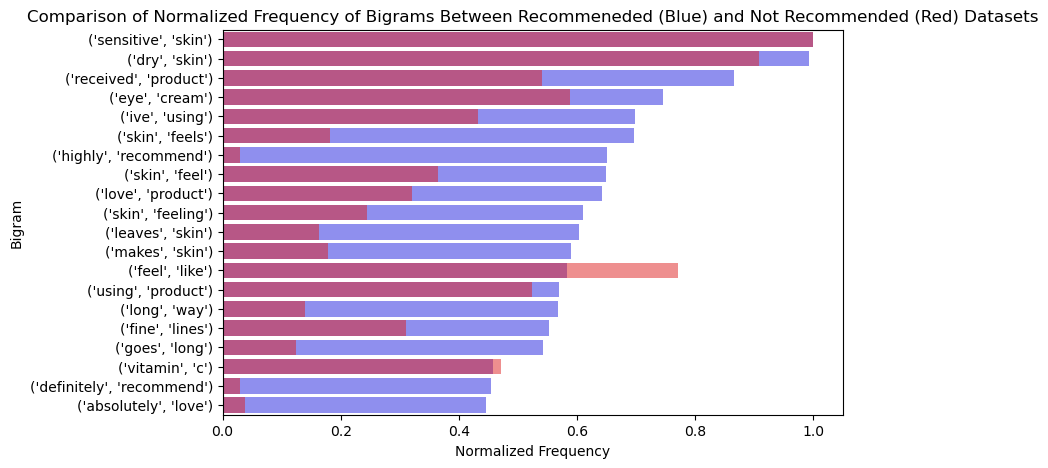

In [29]:
# visualize bigrams

bigrams20 = bigrams.head(20)

fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(y='bigram', 
            x='normalized count (yes recommended)', 
            data=bigrams20,
            alpha=0.5,
            color='blue',
            ax=ax)

ax = sns.barplot(y='bigram', 
            x='normalized count (not recommended)', 
            data=bigrams20, 
            alpha=0.5,
            color='red',
            ax=ax)

ax.set(xlabel="Normalized Frequency", ylabel="Bigram", title='Comparison of Normalized Frequency of Bigrams Between Recommeneded (Blue) and Not Recommended (Red) Datasets')

plt.show()

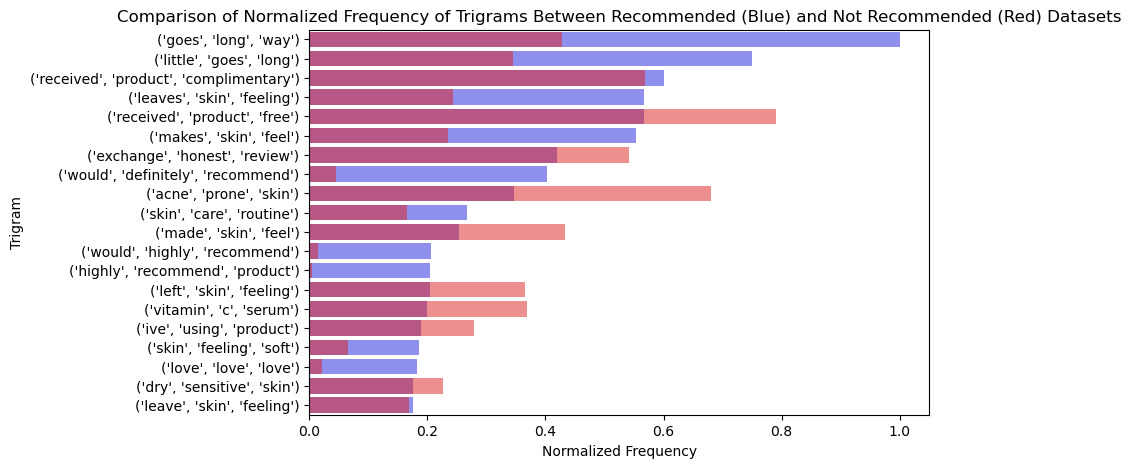

In [30]:
# visualize trigrams

trigrams20 = trigrams.head(20)

fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(y='trigram', 
            x='normalized count (yes recommended)', 
            data=trigrams20,
            alpha=0.5,
            color='blue',
            ax=ax)

ax = sns.barplot(y='trigram', 
            x='normalized count (not recommended)', 
            data=trigrams20, 
            alpha=0.5,
            color='red',
            ax=ax)

ax.set(xlabel="Normalized Frequency", 
       ylabel="Trigram", 
       title='Comparison of Normalized Frequency of Trigrams Between Recommended (Blue) and Not Recommended (Red) Datasets')

plt.show()